# 2. Stage  Two - Data Understanding <a class="anchor"></a>

This project utilizes the Wine Quality dataset from the UCI Machine Learning Repository containing 1,599 red and 4,898 white Portuguese wine samples. The data is provided as two clean CSV files (winequality-red.csv, winequality-white.csv) with identical schemas and no missing values.

Each sample is described by 11 physicochemical input variables and a single sensory quality score rated on a scale of 0 to 10. The input features are:
* fixed acidity
* volatile acidity 
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol

The dataset was originally published by Cortez et al. (2009). This dataset is now a standard machine learning benchmark for classification tasks due to its real-world applicability and rich feature set. <br>

The dataset can be found in -
https://raw.githubusercontent.com/Arifuzzaman-Munaf/dataset/main/bike-sharing-UCI-275.csv

In [171]:
# Import Libraries Required
!pip3 -q install modin
!pip3 -q install matplotlib
!pip3 -q install numpy
!pip3 -q install seaborn
!pip3 -q install plotly
!pip3 -q install wget
!pip3 -q install imbalanced-learn
!pip3 -q install scikit-learn
!pip3 -q install lime
!pip3 -q install shap

In [172]:
import modin.pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import warnings
import missingno as msno
warnings.filterwarnings('ignore')

In [79]:
!mkdir -p dataset # create a directory to store the dataset files

# download the files from the URL to the dataset directory
!wget -q -O dataset/bike-sharing-UCI-275.csv "https://raw.githubusercontent.com/Arifuzzaman-Munaf/dataset/main/bike-sharing-UCI-275.csv"

In [80]:
pd.set_option("display.max_rows", 100, "display.max_columns", 100)
pd.set_option("display.max_colwidth", 100)
pd.set_option("display.max_colwidth", 100)

# load the dataset
df = pd.read_csv("dataset/bike-sharing-UCI-275.csv")

## 2.2 Describe Data <a class="anchor"></a>

In [81]:
# Display the first 10 rows of the dataset
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [82]:
df.tail(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
721,722,2012-12-22,1,1,12,0,6,0,1,0.265833,0.236113,0.441250,0.407346,205,1544,1749
722,723,2012-12-23,1,1,12,0,0,0,1,0.245833,0.259471,0.515417,0.133083,408,1379,1787
723,724,2012-12-24,1,1,12,0,1,1,2,0.231304,0.258900,0.791304,0.077230,174,746,920
724,725,2012-12-25,1,1,12,1,2,0,2,0.291304,0.294465,0.734783,0.168726,440,573,1013
725,726,2012-12-26,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [83]:
# show the columns of the dataset
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [84]:
rows, columns = df.shape
print(f"The dataset has {rows} rows and {columns} columns.")

The dataset has 731 rows and 16 columns.


In [85]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [86]:
#Rename the columns better understanding the data
df.rename(columns={'instant':'record_id',
                    'dteday':'datetime',
                    'yr':'year',
                    'mnth':'month',
                    'weathersit':'weather',
                    'hum':'humidity',
                    'cnt':'bike_count'}, 
                    inplace=True)

# Display the first 10 rows of the dataset
df.head(5)

,record_id,datetime,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,bike_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [87]:
# display the descriptive statistics of the dataset 
# transpose the dataframe to display the statistics in a more readable format
df.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
record_id,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
year,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
month,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weather,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


In [88]:
df.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   record_id   731 non-null    int64  
 1   datetime    731 non-null    object 
 2   season      731 non-null    int64  
 3   year        731 non-null    int64  
 4   month       731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weather     731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  humidity    731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  bike_count  731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [89]:
# display the first 30 rows of the dataset
# use the light_palette function to create a color map
# use the style.background_gradient function to apply the color map to the dataframe
cm = sns.light_palette("green", as_cmap=True)
df.head(30).style.background_gradient(cmap=cm) 

,record_id,datetime,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,bike_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


## 2.3 Verify Data Quality <a class="anchor"></a>
## 2.3.1 Missing Values
In previous steps, while checking data info, it was visible that the dataset contains no missing or null values. But there will be another programmatic check for further confirmation.

In [90]:
print("Total number of missing values in each column:")

# display the total number of missing values in the dataset
pd.DataFrame(df.isnull().sum(), columns=["total"])

Total number of missing values in each column:


,total
record_id,0
datetime,0
season,0
year,0
month,0
holiday,0
weekday,0
workingday,0
weather,0
temp,0


<Axes: >

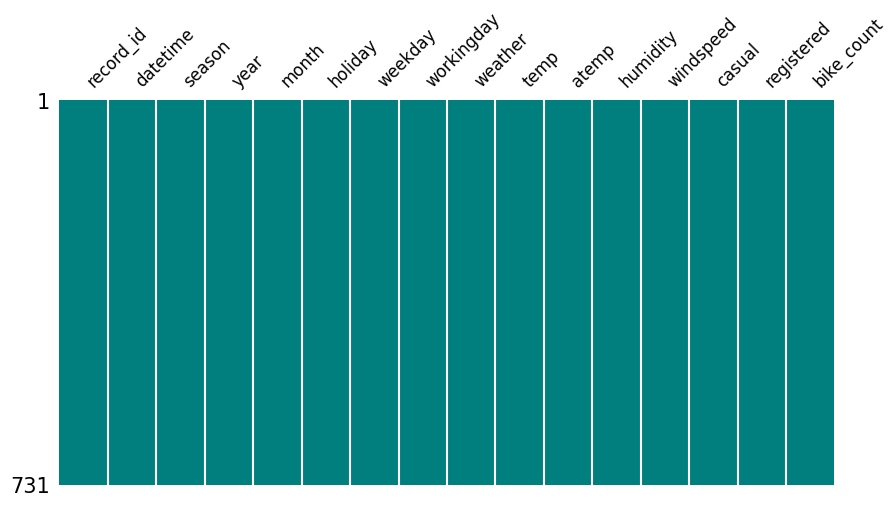

In [91]:
# missingno matrix plot for the dataset
# shows the missing values in the dataset using bar chart
msno.matrix(df,labels=[df.columns],fontsize=12, color=(0.0, 0.5, 0.5), figsize=(10,5),sparkline=False)

The bar chart displays the count of non-null values for each feature in the dataset, showing that all columns contain complete data with 731 entries each. This indicates that the dataset is clean with no missing values across any of the variables, ensuring reliability for further preprocessing and analysis.

## 2.3.2 Data Type verification
The Datatype Verification process ensures if each column in the Bike Sharing dataset is aligned with its intended format before further analysis. First, the actual data types are compared against a predefined schema and any mismatches are reported clearly. For example, the script checks that dteday is a proper datetime, categorical variables like season or holiday are integers, and numerical measures such as temp, atemp, hum, and windspeed are floats. Once discrepancies are identified, the script automatically corrects them by coercing values into the desired types, safely handling errors and finalizing integers where possible. After corrections, the updated schema is displayed, confirming that the dataset is now clean, consistent, and ready for reliable analysis.

In [92]:
from pandas.api.types import (
    is_integer_dtype,
    is_float_dtype,
    is_datetime64_any_dtype,
)

# Define the expected data types for each column in the dataset
desired_dtypes = {
    "datetime": "datetime64[ns]",    # Timestamp when rental occurred
    "season": "int64",               # Season of year (1-4)
    "year": "int64",                 # Year (0=2011, 1=2012)
    "month": "int64",                # Month (1-12)
    "holiday": "int64",              # Holiday flag (0/1)
    "weekday": "int64",              # Day of week (0-6)
    "workingday": "int64",           # Working day flag (0/1)
    "weather": "int64",              # Weather category (1-4)
    "temp": "float64",               # temperature in Celsius
    "atemp": "float64",              # feeling temperature in Celsius
    "humidity": "float64",           # humidity percentage
    "windspeed": "float64",          # wind speed
    "casual": "int64",               # Count of casual users
    "registered": "int64",           # Count of registered users
    "bike_count": "int64",           # Total rental count
    "record_id": "int64",            # Unique row identifier
}

def canonical_dtype(dtype_obj) -> str:
    """
    This function takes a pandas/numpy dtype object and returns a standardized string 
    representation to enable reliable dtype comparisons.

    Returns:
        str: The standardized string representation of the dtype
    """
    if is_datetime64_any_dtype(dtype_obj):
        return "datetime64[ns]"
    if is_integer_dtype(dtype_obj):
        return "int64"
    if is_float_dtype(dtype_obj):
        return "float64"
    return str(dtype_obj)

# Compare actual vs desired data types
# Create a dictionary of actual data types for each column
actual_canon = {col: canonical_dtype(dt) for col, dt in df.dtypes.to_dict().items()}

# Create a dictionary of mismatches between actual and desired data types
mismatches = {
    col: {"expected": exp, "actual": actual_canon.get(col, "MISSING")}
    for col, exp in desired_dtypes.items()
    if actual_canon.get(col) != exp
}

print("Column-wise data type verification report:")
if mismatches:
    for col, info in mismatches.items():
        print(f"Column '{col}': expected {info['expected']}, got {info['actual']}")
else:
    print("All columns match desired datatypes")

print("-" * 50)

if mismatches:
    # Fix mismatches between actual and desired data types
    for col, info in mismatches.items():
        # Get the expected data type for the column
        target = info["expected"]
        # Convert datetime64[ns] to datetime
        if target == "datetime64[ns]":
            df[col] = pd.to_datetime(df[col], errors="coerce")
        # Convert integer types to Int64
        elif target.startswith("int"):
            df[col] = pd.to_numeric(df[col], errors="coerce").astype("Int64")
            # If no nulls, convert to plain int64
            if df[col].isna().sum() == 0:
                df[col] = df[col].astype("int64")
        # Convert float types to float64
        elif target.startswith("float"):    
            df[col] = pd.to_numeric(df[col], errors="coerce").astype("float64")


        print("Column-wise data type verification report after correction:")
        print(df.dtypes)


Column-wise data type verification report:
Column 'datetime': expected datetime64[ns], got object
--------------------------------------------------
Column-wise data type verification report after correction:
record_id              int64
datetime      datetime64[ns]
season                 int64
year                   int64
month                  int64
holiday                int64
weekday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity             float64
windspeed            float64
casual                 int64
registered             int64
bike_count             int64
dtype: object


The datatype verification process revealed that the datetime column was initially stored as an object instead of the required datetime64[ns], which could have caused issues in time-series analysis. After applying the correction, all columns were successfully aligned with their expected datatypes. This ensures the dataset is now clean, consistent and ready for accurate downstream analysis under the CRISP-DM framework.

## 2.3.3 Duplicate Record Verification
In this section, duplicate records within the dataset are checked to ensure data integrity. The process involves counting the number of completely duplicated rows and verifying that the record_id column contains only unique values. Since record_id serves as the primary identifier for each entry, confirming its uniqueness guarantees that no observation is duplicated or misrepresented. This verification step is essential to maintain dataset reliability, prevent bias in analysis and ensure that each record contributes only once to modeling and decision-making.

In [93]:
# count the number of duplicate rows
dup_rows = df.duplicated().sum()

# check if the record_id is unique
record_id_unique = df["record_id"].is_unique

# print the number of duplicate rows and if the record_id is unique
print(f"Duplicate rows: {dup_rows}")
print(f"record_id is unique: {record_id_unique}")

Duplicate rows: 0
record_id is unique: True


## 2.3.4 Verify Ranges and Domain Logic
In this step, categorical ranges and business rules were validated to ensure the dataset’s integrity. Specifically:

- Categorical validation: Checked season, year, month, holiday, weekday, workingday, and weather against their allowed sets to confirm no invalid category codes exist.

- Bike count consistency: Verified that bike_count always equals the sum of casual and registered riders, with mismatches flagged if found.

Together, these verifications confirm that categorical values are within expected ranges and  the dataset maintains logical consistency for further analysis.

In [94]:
# Allowed value sets for categorical inputs
allowed_values = {
    "season": {1, 2, 3, 4},      # Season of year (1-4)
    "year": {0, 1},              # Year (0=2011, 1=2012)
    "month": {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}, # Month (1-12)
    "holiday": {0, 1},           # Holiday flag (0/1)
    "weekday": {0, 1, 2, 3, 4, 5, 6}, # Day of week (0-6)
    "workingday": {0, 1},          # Working day flag (0/1)
    "weather": {1, 2, 3, 4},       # Weather category (1-4)
}

# check if the values in the dataset are within the allowed sets and store invalid ranges
invalid_ranges = {}
for col, allowed_values in allowed_values.items():
    invalid_values = set(df[col]) - allowed_values
    if invalid_values:
        invalid_ranges[col] = invalid_values

# print the invalid ranges
if invalid_ranges:
    print("Invalid ranges found in the columns:")
    for col, invalid_values in invalid_ranges.items():
        print(f"{col}: {invalid_values}")
else:
    print("No invalid ranges found in the categorical columns")

No invalid ranges found in the categorical columns


In [95]:
# total bike count should equal sum of casual and registered riders
total_match = (df["bike_count"] == df["casual"] + df["registered"]).all()
mismatch_count = (~(df["bike_count"] == df["casual"] + df["registered"])).sum()

print(f"Total bike count matches sum of casual and registered riders: {total_match}")
if not total_match:
    print(f"Found {mismatch_count} records with mismatched totals")
    mismatches = df[df["bike_count"] != df["casual"] + df["registered"]].head() 
    if not mismatches.empty:
        print("Sample of mismatches:")
        print(mismatches[["bike_count", "casual", "registered"]])


Total bike count matches sum of casual and registered riders: True


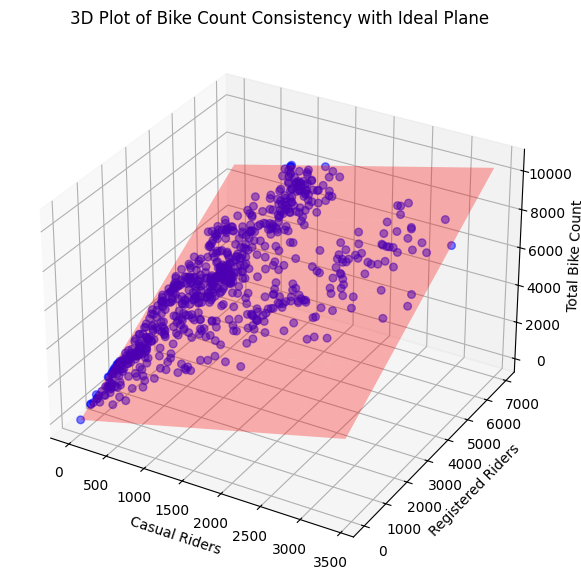

In [96]:
# Initialize 3D plot
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, projection="3d")

# Sample data points for better performance while maintaining visual representation
# Using random sampling to avoid bias and reduce memory/computation requirements
sample_size = min(1000, len(df))  # Cap sample size at 1000 points
sample_idx = np.random.choice(len(df), sample_size, replace=False)

ax.scatter(df["casual"].iloc[sample_idx], 
          df["registered"].iloc[sample_idx],
          df["bike_count"].iloc[sample_idx],
          c="blue", alpha=0.5, label="Data Points",
          # Add s parameter for consistent point size
          s=30)

# Generate reference plane showing ideal relationship where total = casual + registered
casual_min, casual_max = df["casual"].min(), df["casual"].max()
registered_min, registered_max = df["registered"].min(), df["registered"].max()
grid_points = 20  # Reduced grid density for better performance

# Create mesh grid for reference plane
casual_grid = np.linspace(casual_min, casual_max, grid_points)
registered_grid = np.linspace(registered_min, registered_max, grid_points)
casual_mesh, registered_mesh = np.meshgrid(casual_grid, registered_grid)
bike_count_mesh = casual_mesh + registered_mesh  # Ideal relationship plane

ax.plot_surface(casual_mesh, registered_mesh, bike_count_mesh,
               color="red", alpha=0.3, 
               rstride=5, cstride=5,  
               label="Ideal Plane: Total = Casual + Registered")

# Set descriptive labels and title
ax.set_xlabel("Casual Riders", fontsize=10)
ax.set_ylabel("Registered Riders", fontsize=10)
ax.set_zlabel("Total Bike Count", fontsize=10)
ax.set_title("3D Plot of Bike Count Consistency with Ideal Plane")

plt.show()

The verification process confirmed that the dataset is clean, valid, and logically consistent. First, all categorical variables (season, year, month, holiday, weekday, workingday, and weather) were checked against their predefined domains and no invalid values were detected, ensuring categorical integrity. Second, the consistency check between bike_count and the sum of casual and registered riders returned True, confirming that total counts are accurately computed without mismatches across the dataset. Finally, the 3D scatter plot with an ideal reference plane visually demonstrated this relationship, where all data points align perfectly with the plane defined by:

Bike Count = Casual + Registered

This strong alignment validates the internal logic of the dataset, providing confidence that the data is both accurate and ready for exploratory data analysis.

## 2.3.5 Data Inconsistency

In [97]:
# Check for negative values in each column
pd.DataFrame(df[df.select_dtypes(include=['int64', 'float64']).columns].lt(0).sum(), columns=["total"])

,total
record_id,0
season,0
year,0
month,0
holiday,0
weekday,0
workingday,0
weather,0
temp,0
atemp,0


The analysis of the dataset for negative values across all numeric columns confirmed that there are no negative entries present. This indicates that all recorded values such as counts, temperatures and other measurements are valid within expected ranges. The absence of negative values supports the integrity of the data and suggests that there are no data entry errors or logical inconsistencies related to value sign which is essential for reliable downstream analysis.

In [98]:
# Check for logical conflicts between holiday and workingday columns
# A day should not be both a holiday and a working day
holiday_conflicts = df[(df["holiday"] == 1) & (df["workingday"] == 1)]
print("Columns with Holiday/Workingday conflicts:", len(holiday_conflicts))

Columns with Holiday/Workingday conflicts: 0


There was no sign of inconsistency in logic as shown the output but there would a visual diagram for further confirmation of this data logic.  

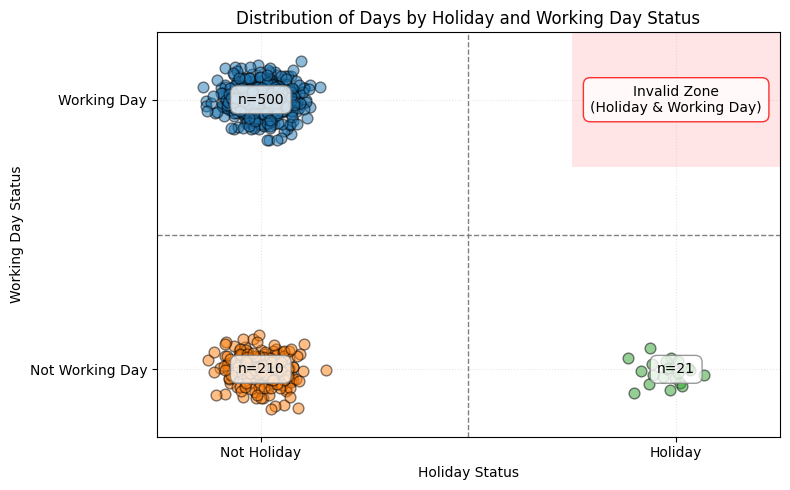

In [99]:
# Create visualization of holiday vs workingday
fig, ax = plt.subplots(figsize=(8, 5))

# Define point configurations
points = [
    ((df['holiday'] == 0) & (df['workingday'] == 1), (0.3, 0.7)),
    ((df['holiday'] == 0) & (df['workingday'] == 0), (0.3, 0.3)),
    ((df['holiday'] == 1) & (df['workingday'] == 0), (0.7, 0.3))
]

# Plot points with jitter
for mask, pos in points:
    data = df[mask]
    # Add jitter to prevent point overlap
    x = pos[0] + np.random.normal(0, 0.02, len(data))
    y = pos[1] + np.random.normal(0, 0.02, len(data))
    
    # Plot points with jitter
    ax.scatter(x, y, s=60, alpha=0.5, edgecolor='black', linewidth=1)
    ax.annotate(f'n={len(data)}', xy=pos, ha='center', va='center',
                bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='gray', alpha=0.8))

# Mark invalid region (Holiday & Working Day)
invalid_zone = plt.Rectangle((0.6, 0.6), 0.2, 0.2, fc='red', alpha=0.1)
ax.add_patch(invalid_zone)
ax.annotate('Invalid Zone\n(Holiday & Working Day)', 
           xy=(0.7, 0.7), ha='center', va='center',
           bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='red', alpha=0.8))

# Add separator lines to the plot
# Vertical separator between Not Holiday (0.3) and Holiday (0.7)
ax.axvline(x=0.5, color='gray', linestyle='--', linewidth=1)
# Horizontal separator between Not Working Day (0.3) and Working Day (0.7)
ax.axhline(y=0.5, color='gray', linestyle='--', linewidth=1)

# Customize plot
ax.set_xlim(0.2, 0.8) # set the x-axis limits
ax.set_ylim(0.2, 0.8) # set the y-axis limits
ax.set_xlabel('Holiday Status')
ax.set_ylabel('Working Day Status')
ax.set_xticks([0.3, 0.7])
ax.set_yticks([0.3, 0.7])
ax.set_xticklabels(['Not Holiday', 'Holiday'])
ax.set_yticklabels(['Not Working Day', 'Working Day'])
ax.grid(True, linestyle=':', alpha=0.3) # add grid lines
ax.set_title('Distribution of Days by Holiday and Working Day Status')

plt.tight_layout()
plt.show()

Findings from the plot:
- The majority of records (n=500) fall in the Not Holiday & Workingday group representing typical weekdays.
- n=210 records fall in the Not Holiday & Not Workingday group corresponding to weekends.
- n=21 records fall in the Holiday & Not Workingday group representing actual holidays.
- Importantly, the conflict zone (Holiday = 1 and Workingday = 1) is highlighted in red, but it contains 0 records, confirming that no day is incorrectly marked as both a holiday and a working day.

## 2.3.6 Outliers

Outliers were detected with a One-Class Support Vector Machine (OCSVM) trained on standardized numeric features: temp, atemp, humidity, windspeed, and bike_count. Features were scaled with StandardScaler to zero mean/unit variance, then an OCSVM with RBF kernel, gamma="auto", and nu=0.05 (≈5% expected anomalies) was fitted to learn the boundary of normal behavior. Predictions (1 = inlier, -1 = outlier) were stored in df["ocsvm_outlier"] and the total outlier count was reported.

**Why this method.**
- Unsupervised & robust: Suitable when explicit anomaly labels are unavailable, learning “normal” directly from data.
- Multivariate & non-linear: Captures joint, non-linear relationships among weather and demand variables that univariate z-score/IQR rules can miss.
- Controllable sensitivity: nu provides a principled control over the tolerated fraction of anomalies.

To aid interpretation, pairwise 2D decision boundaries were plotted for (temp,bike_count), (humidity,bike_count), (windspeed,bike_count), and (atemp,bike_count). For each pair, data were re-scaled and a lightweight 2D OCSVM was fitted only for visualization, rendering the decision contour (boundary at decision_function=0), shaded normal region and marking inliers vs. outliers. 

In [100]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

# Select relevant numeric features for outlier detection
features = ["temp", "atemp", "humidity", "windspeed", "bike_count"]
X = df[features]

# Standardize the features to have mean=0 and variance=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize One-Class SVM for anomaly detection
# kernel="rbf": radial basis function kernel
# gamma="auto": kernel coefficient set to 1/n_features
# nu=0.05: an upper bound on the fraction of outliers
oc_svm = OneClassSVM(kernel="rbf", gamma="auto", nu=0.05)
oc_svm.fit(X_scaled)  # Fit the model to the scaled data

# Predict anomalies: 1 for inliers, -1 for outliers
preds = oc_svm.predict(X_scaled)
df["ocsvm_outlier"] = preds  # Add predictions to the DataFrame

In [101]:
# Count outliers
outlier_count = (preds == -1).sum()
print(f"Detected outliers: {outlier_count} out of {len(df)}")

# Show sample outliers
print(df[df["ocsvm_outlier"] == -1][features].head())

Detected outliers: 45 out of 731
        temp     atemp  humidity  windspeed  bike_count
8   0.138333  0.116175  0.434167   0.361950         822
21  0.059130  0.079070  0.400000   0.171970         981
23  0.097391  0.117930  0.491739   0.158330        1416
25  0.217500  0.203600  0.862500   0.293850         506
26  0.195000  0.219700  0.687500   0.113837         431


The One-Class SVM model identified 45 outliers out of 731 total records (~6.2%).
These flagged instances represent unusual patterns across weather variables (temp, atemp, humidity, windspeed) and demand (bike_count) that deviate from the learned distribution of normal conditions.

For example, some detected outliers show high bike counts (e.g., 1416 at index 23) despite relatively moderate weather conditions, while others reflect unusually high humidity or atypical combinations of features. This indicates that the OCSVM is capturing both anomalies and weather-demand mismatches rather than just extreme univariate values.

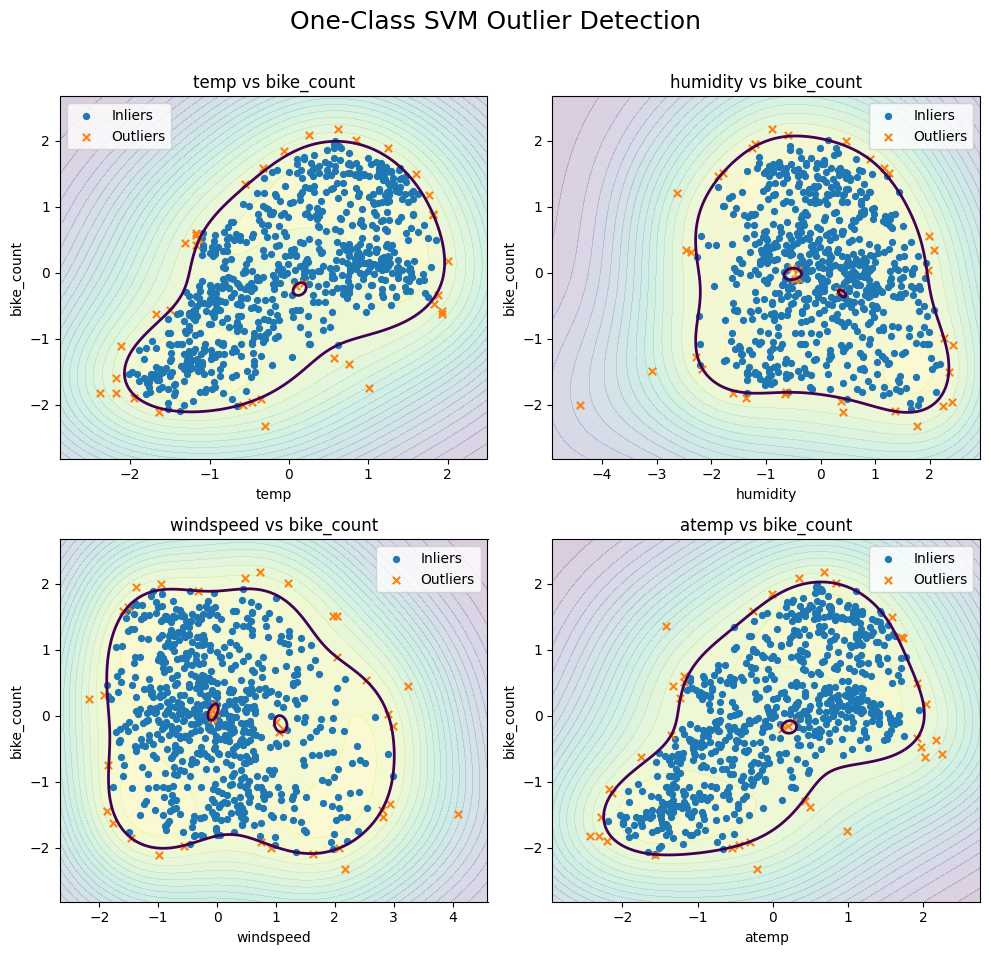

In [102]:
# Define feature pairs to visualize outlier detection relationships
pairs = [
    ("temp", "bike_count"),
    ("humidity", "bike_count"),
    ("windspeed", "bike_count"),
    ("atemp", "bike_count"),
]

def plot_ocsvm(df, pairs):
    """
    Visualize One-Class SVM outlier detection results for multiple feature pairs side by side.

    Parameters:
        df (pd.DataFrame): The input DataFrame containing the features.
        pairs (list of tuple): List of (x_col, y_col) feature pairs to plot.
    """
    # Calculate the number of rows and columns for the subplots
    n = len(pairs)
    ncols = 2
    nrows = -(-n // ncols)  # Ceiling division for number of rows
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 5 * nrows))
    axes = axes.flatten()

    # Iterate through each feature pair and plot the SVM decision boundary and outliers
    for idx, (x_col, y_col) in enumerate(pairs):
        ax = axes[idx]
        # Ensure both columns exist in the DataFrame
        if x_col not in df.columns or y_col not in df.columns:
            raise ValueError(f"Columns {x_col} and/or {y_col} not found in DataFrame.")

        # Extract and standardize the two features for SVM
        X_pair = df[[x_col, y_col]].astype(float).values
        Xs = StandardScaler().fit_transform(X_pair)

        # Create a mesh grid for decision boundary visualization
        x_min, x_max = Xs[:, 0].min() - 0.5, Xs[:, 0].max() + 0.5
        y_min, y_max = Xs[:, 1].min() - 0.5, Xs[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                             np.linspace(y_min, y_max, 200))

        # Fit One-Class SVM on the pair for 2D visualization
        oc_local = OneClassSVM(kernel="rbf", nu=0.05, gamma="auto")
        oc_local.fit(Xs)

        # Predict the decision boundary and outliers
        Z = oc_local.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        preds_pair = oc_local.predict(Xs)

        # Plot SVM decision boundary and shade regions
        ax.contour(xx, yy, Z, levels=[0], linewidths=2)
        ax.contourf(xx, yy, Z, levels=20, alpha=0.2)

        # Plot inliers and outliers
        in_mask = preds_pair == 1
        out_mask = preds_pair == -1
        ax.scatter(Xs[in_mask, 0], Xs[in_mask, 1], s=18, label="Inliers")
        ax.scatter(Xs[out_mask, 0], Xs[out_mask, 1], s=28, marker="x", label="Outliers")

        ax.set_xlabel(x_col)
        ax.set_ylabel(y_col)
        ax.set_title(f"{x_col} vs {y_col}")
        ax.legend()

    fig.suptitle("One-Class SVM Outlier Detection", fontsize=18)
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()

# Run the side-by-side outlier detection plots for the specified feature pairs
plot_ocsvm(df, pairs)


The plots illustrate the results of One-Class SVM outlier detection across different feature pairs with bike demand. In all four cases (temp, atemp, humidity, and windspeed vs. bike_count), the decision boundary successfully separates the dense central regions of normal observations (inliers) from sparse, irregular points (outliers) scattered around the boundary. Most bike rental patterns follow expected weather–demand relationships but a small fraction of instances fall outside the learned boundary indicating anomalous conditions. These anomalies often appear at the extremes of the feature ranges or reflect unusual combinations of weather factors with bike usage highlighting potential special events, rare scenarios or data inconsistencies.

### Summary of Data Verification Step

**Data Quality Assessment:**
	•	Completeness: The dataset contains 731 records with no missing values across all 16 columns.
	•	Uniqueness: All records are unique; no duplicate entries were identified.
	•	Validity: All numeric columns contain non-negative values.

Data Integrity Checks:
	•	Datetime Consistency: The ‘datetime’ column has been successfully converted to datetime64[ns] format.
	•	Categorical Validity: All categorical variables fall within their expected value ranges.
	•	Logical Consistency: The ‘bike_count’ column is the sum of ‘casual’ and ‘registered’ riders for every record.
	•	Mutual Exclusivity: The ‘holiday’ and ‘working day’ indicators are mutually exclusive, with no conflicting records.

Outlier Detection:
	•	Method: One-Class SVM (RBF kernel) was applied on standardized numerical features (temp, atemp, humidity, windspeed, and bike_count) to identify anomalies.
	•	Findings: 45 outliers were detected out of 731 observations (~6.2%). These outliers are primarily located at the boundary of typical feature distributions, representing unusual weather–demand combinations such as unexpected bike counts under extreme temperature, humidity, or windspeed conditions.
	•	Implication: While the majority of data points fall within normal behavioral patterns, these anomalies may correspond to special events, rare conditions, or potential data inconsistencies. They will be carefully considered in subsequent phases to avoid skewed predictions.

Dataset Overview:
	•	Dimensions: 731 rows × 16 columns
	•	Distribution: 500 weekday records, 210 weekend records, and 21 holiday records

## 2.4 Initial Data Exploration  <a class="anchor"></a>
## 2.4.1 Data Distribution

In [105]:
# show the number of unique values for each feature, including the feature (column) names
pd.DataFrame({
    "Feature": df.drop(columns=["ocsvm_outlier"]).nunique().sort_values().index,
    "Unique Values": df.drop(columns=["ocsvm_outlier"]).nunique().sort_values().values
})

,Feature,Unique Values
0,year,2
1,holiday,2
2,workingday,2
3,weather,3
4,season,4
5,weekday,7
6,month,12
7,temp,499
8,humidity,595
9,casual,606


The analysis shows the number of unique values for each feature in the dataset (excluding the ocsvm_outlier column).
- Categorical features like year, holiday, workingday, weather, season, weekday, and month have small sets of unique values, which is expected since they represent discrete categories.

- Continuous/numeric features such as temp (499 unique), humidity (595), windspeed (650), atemp (690), and bike_count (696) have high cardinality, indicating they capture a wide range of measurements.

- Identifiers (record_id and datetime) have 731 unique values, confirming that each record is distinct.

In [164]:
# remove the columns that are not needed for the input features
removed_columns = ["ocsvm_outlier", "bike_count", 'record_id']
x_df = df.drop(columns=removed_columns)

# get the target variable
y_df = df['bike_count']
x_df.head()

,datetime,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518


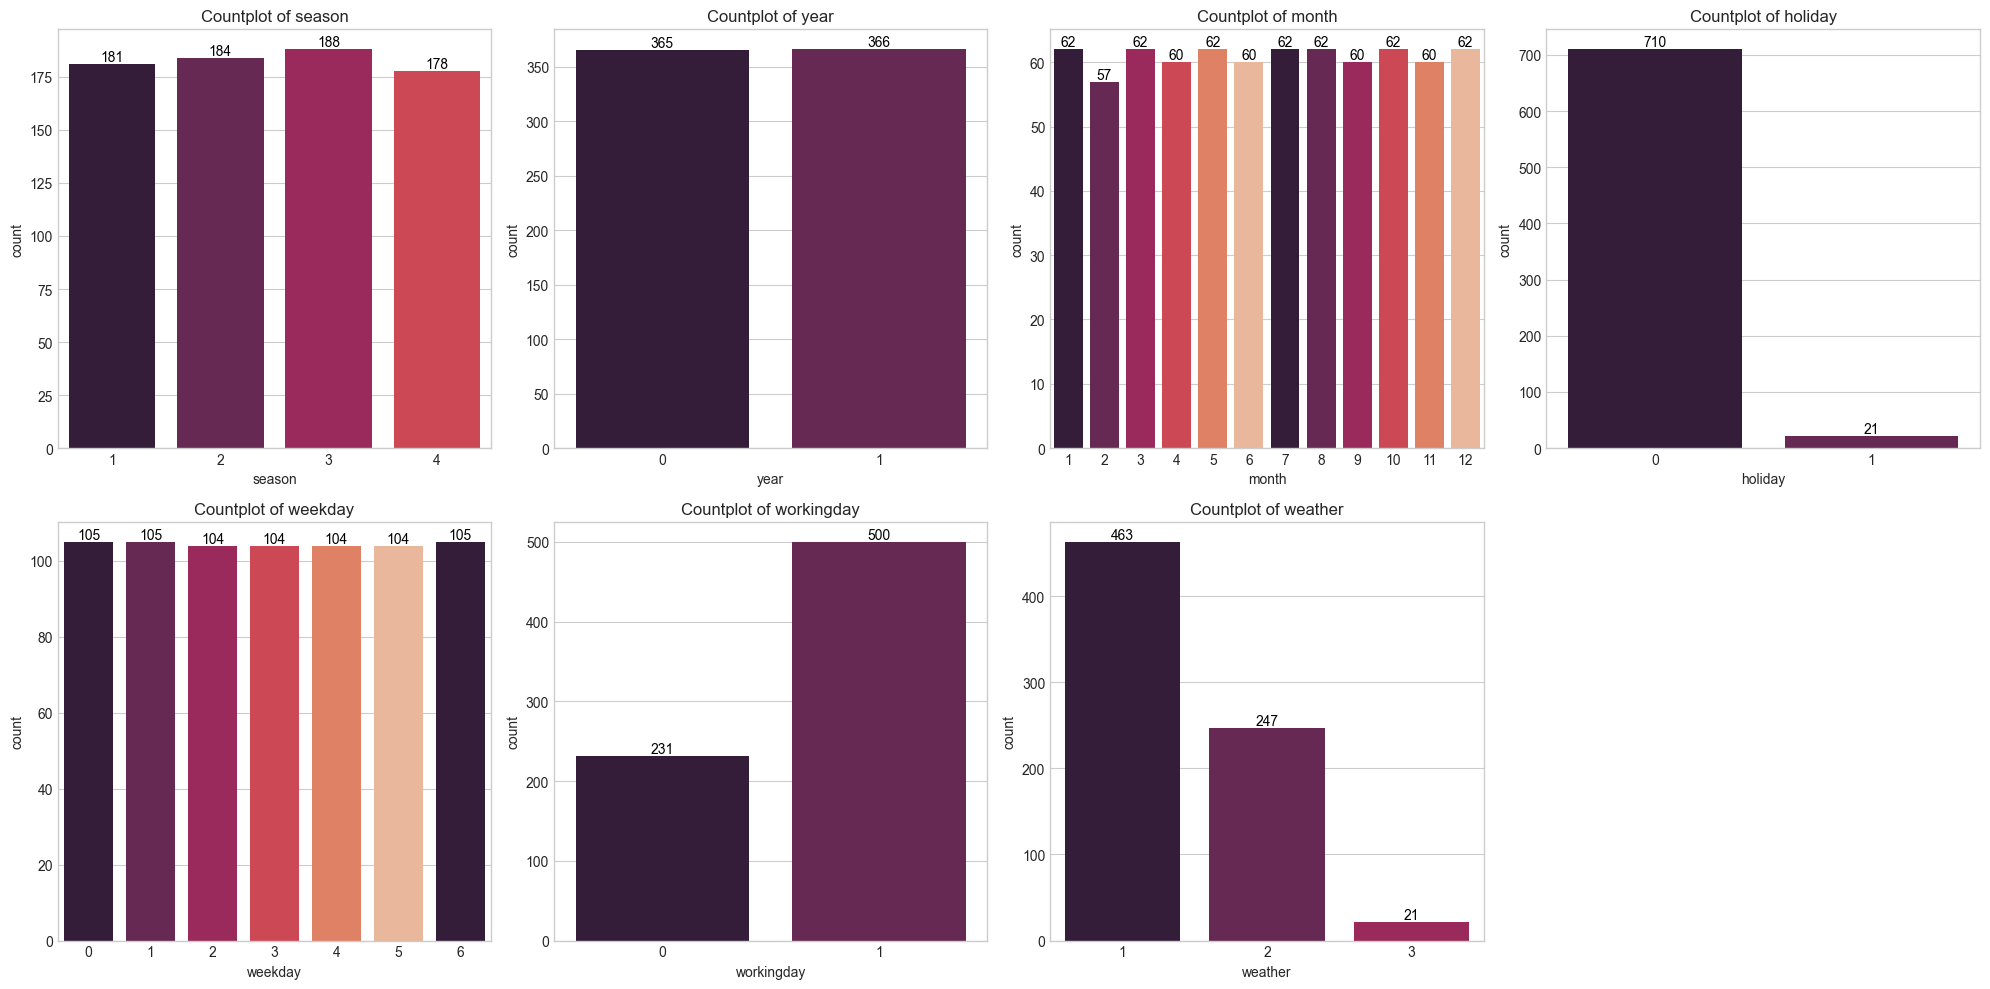

In [170]:
# Define columns to exclude from categorical plots
exclude_cols = {'datetime', 'registered', 'casual', 'windspeed', 'humidity', 'atemp', 'temp'}

# Select categorical columns by excluding the above columns from x_df
cat_cols = [col for col in x_df.columns if col not in exclude_cols]

# Set up the subplot grid
n_cols = 4
n_rows = (len(cat_cols) + n_cols - 1) // n_cols  # Ceiling division to get number of rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()  # Flatten axes array for easy indexing

# Choose a visually appealing color palette for the plots
palette = sns.color_palette("rocket")  # Improved color palette

# Loop through each categorical column and create a countplot
for idx, col in enumerate(cat_cols):
    ax = axes[idx]
    sns.countplot(x=col, data=x_df, ax=ax, palette=palette)
    ax.set_title(f'Countplot of {col}')
    # Annotate each bar with its count value
    for p in ax.patches:
        count = int(p.get_height())
        ax.annotate(f'{count}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black')

# Hide any unused subplots (in case the grid is larger than the number of categorical columns)
for ax in axes[len(cat_cols):]:
    ax.set_visible(False)

# Adjust layout to prevent overlap and display the plots
plt.tight_layout()
plt.show()

This set of count plots shows the distribution of categorical features:
- Balanced: Season, year, month, and weekday are evenly distributed.
- Imbalanced: Holidays (very few), working days (more common than non-working), and weather (mostly clear, very few rainy/snowy days, no extreme weather).
- These imbalances may bias the model toward normal working days with clear weather, limiting generalization for holidays and rare weather events.

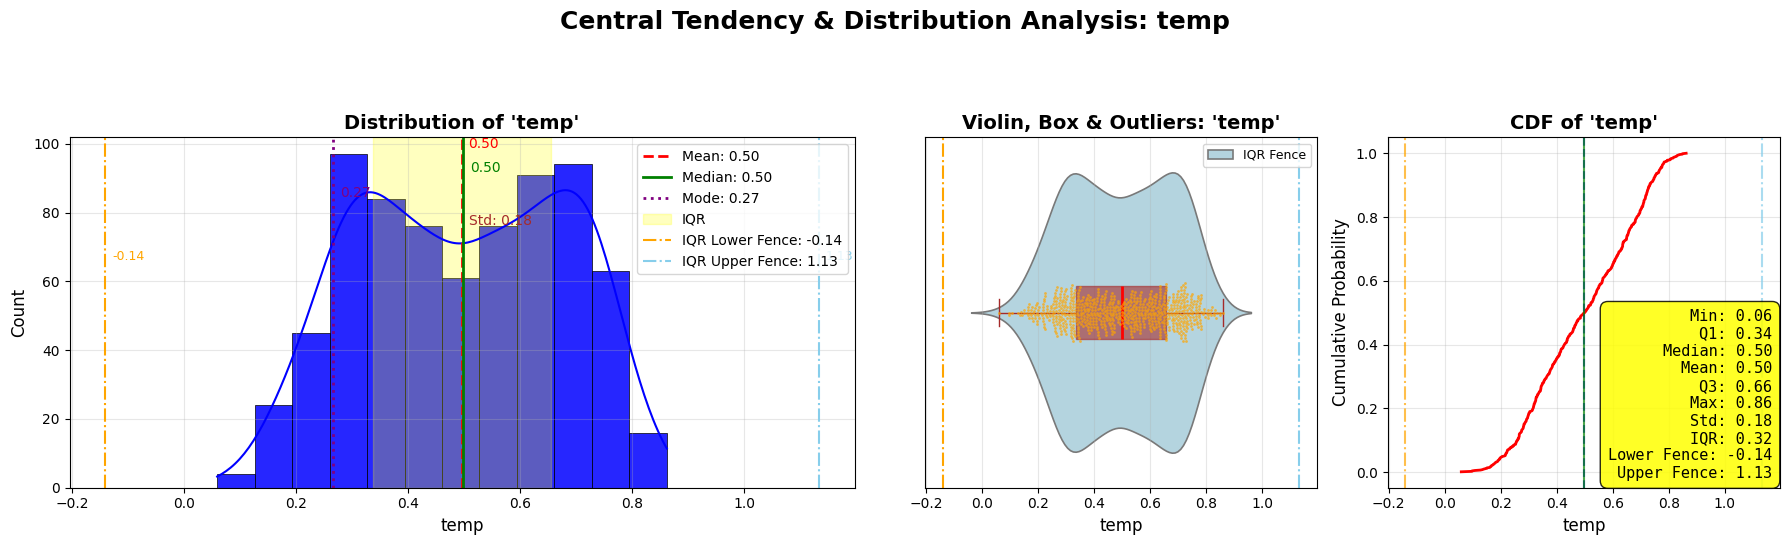

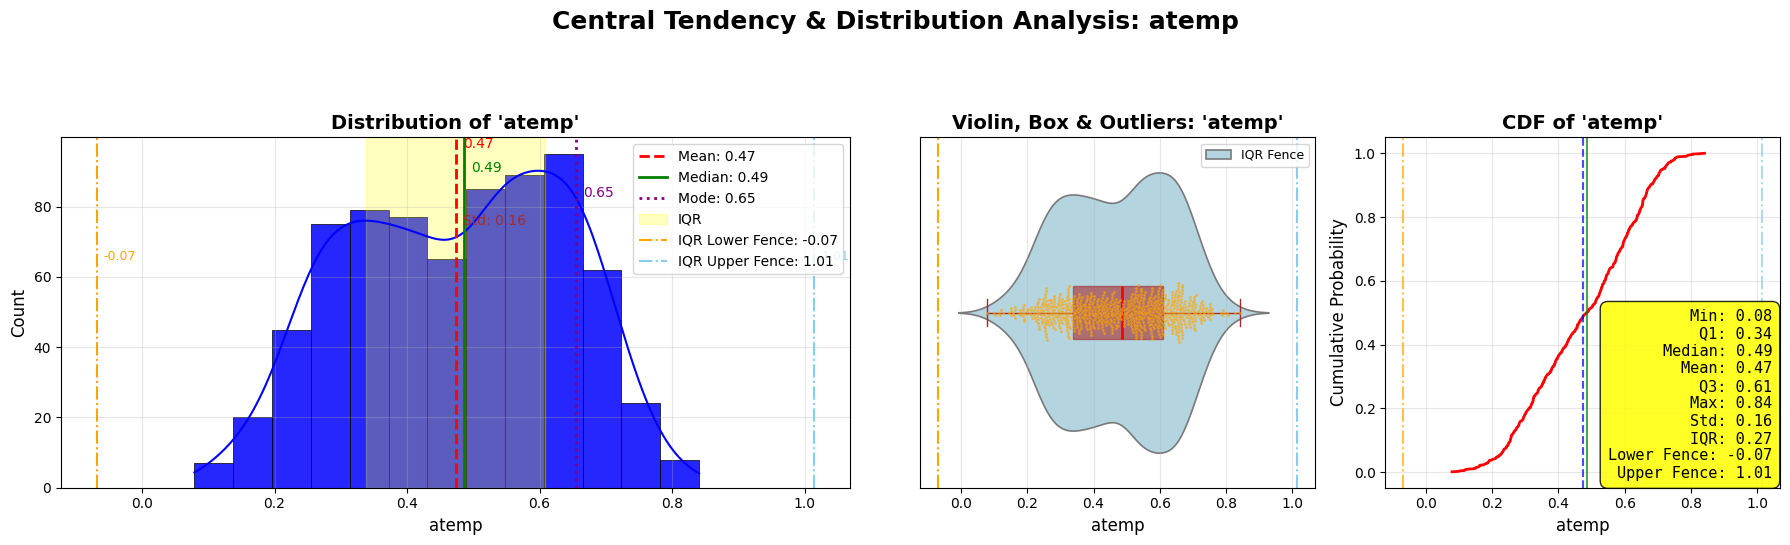

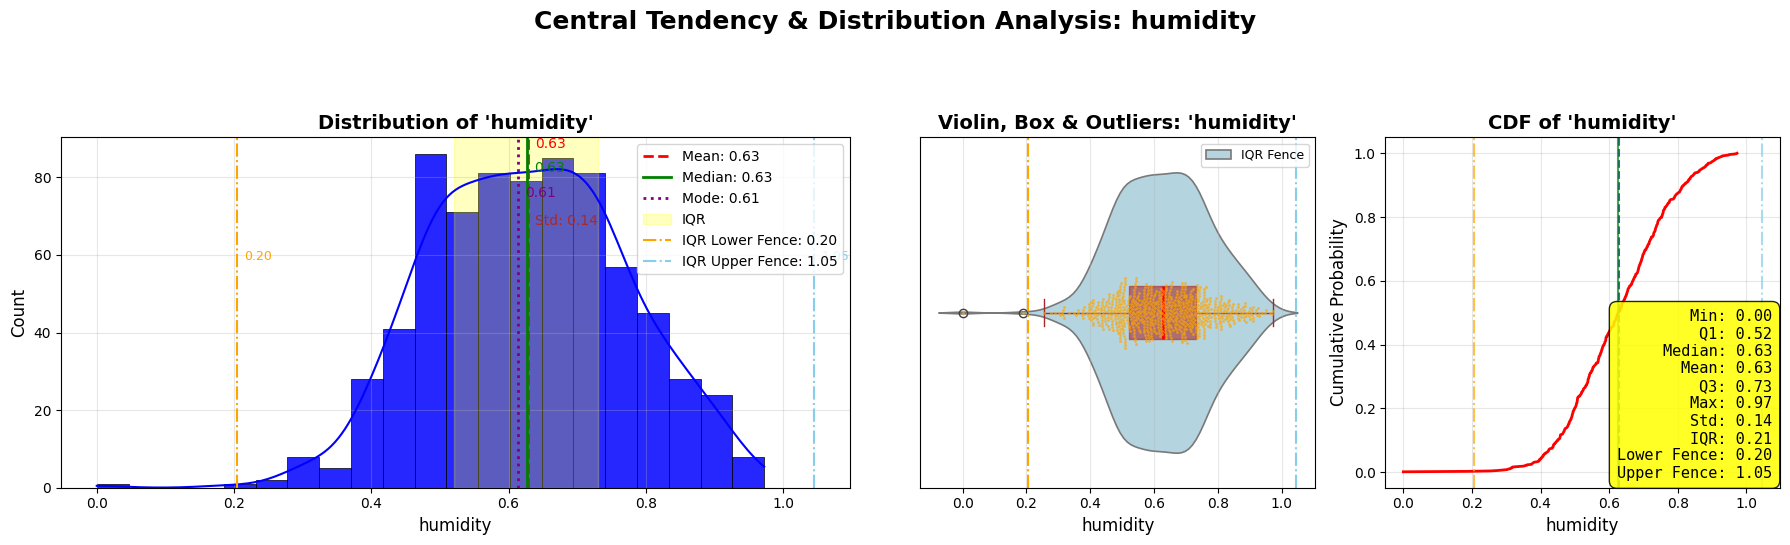

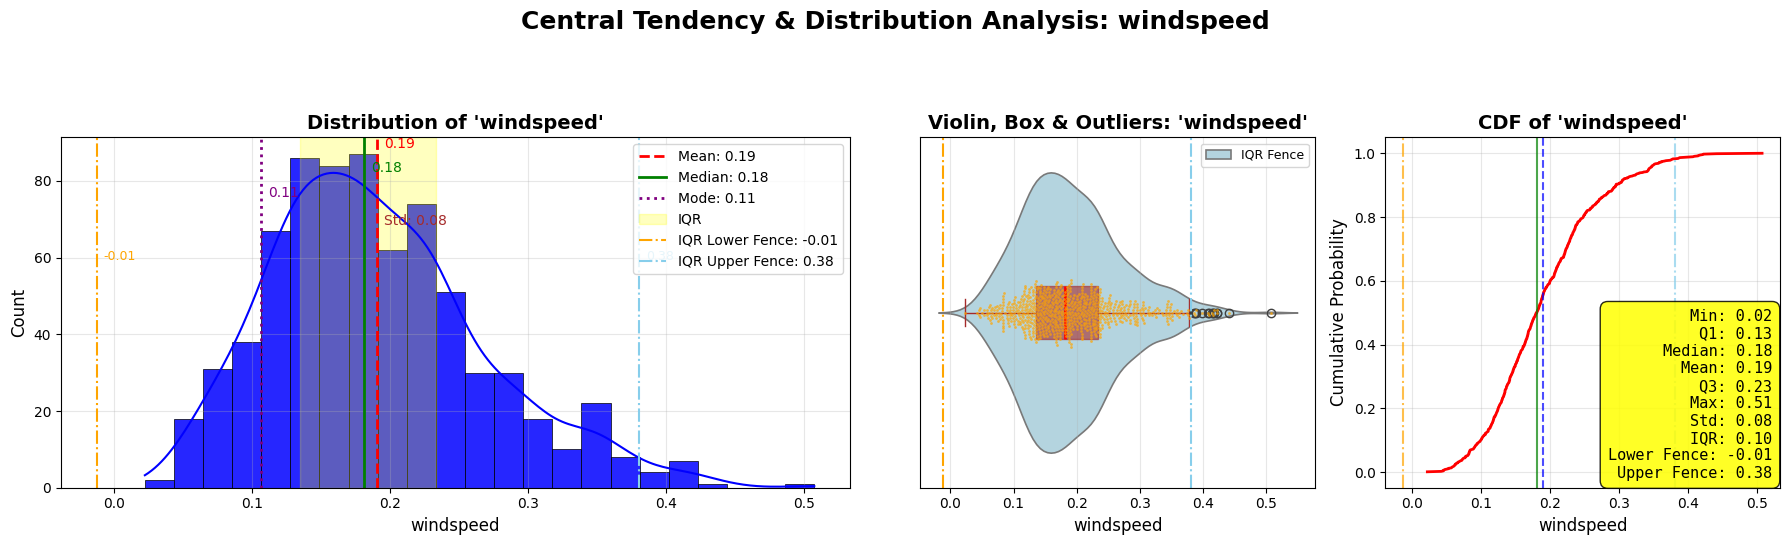

In [129]:
def plot_central_tendency(df, features):
    """
    Visualization of central tendency and distribution for numerical features.

    Args:
        df: pandas DataFrame containing the data
        features: list of feature names
    """

    # Precompute statistics for all features to avoid repeated computation
    means = df[features].mean()      # Series of means for each feature
    medians = df[features].median()  # Series of medians for each feature
    stds = df[features].std()        # Series of standard deviations for each feature
    mins = df[features].min()        # Series of minimums for each feature
    maxs = df[features].max()        # Series of maximums for each feature
    q1s = df[features].quantile(0.25)  # Series of 25th percentiles (Q1)
    q3s = df[features].quantile(0.75)  # Series of 75th percentiles (Q3)
    modes = df[features].mode().iloc[0] # Series of modes for each feature

    # Plot the statistics for each feature
    for feature in features:
        # Extract precomputed statistics for the current feature
        mean = means[feature]
        median = medians[feature]
        std = stds[feature]
        min_ = mins[feature]
        max_ = maxs[feature]
        mode = modes[feature]
        q1_val = q1s[feature]
        q3_val = q3s[feature]
        iqr = q3_val - q1_val
        lower_fence = q1_val - 1.5 * iqr
        upper_fence = q3_val + 1.5 * iqr

        # Create a figure with 3 subplots: histogram, violin/box, and CDF
        fig, axes = plt.subplots(1, 3, figsize=(18, 5), gridspec_kw={'width_ratios': [2, 1, 1]})

        # Histogram with KDE and central tendency lines
        sns.histplot(
            data=df, x=feature, color='blue', kde=True, ax=axes[0], 
            edgecolor='black', linewidth=0.5, alpha=0.85  # Style the histogram
        )

        # Add vertical lines for mean, median, and mode
        axes[0].axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}', linewidth=2)
        axes[0].axvline(median, color='green', linestyle='-', label=f'Median: {median:.2f}', linewidth=2)
        axes[0].axvline(mode, color='purple', linestyle=':', label=f'Mode: {mode:.2f}', linewidth=2)
        # Highlight the interquartile range (IQR) as a shaded region
        axes[0].axvspan(q1_val, q3_val, color='yellow', alpha=0.25, label='IQR')
        # Add IQR fences as dashed black lines
        axes[0].axvline(lower_fence, color='orange', linestyle='-.', linewidth=1.5, label=f'IQR Lower Fence: {lower_fence:.2f}')
        axes[0].axvline(upper_fence, color='skyblue', linestyle='-.', linewidth=1.5, label=f'IQR Upper Fence: {upper_fence:.2f}')
        axes[0].legend(loc='upper right', fontsize=10, frameon=True)  # Show legend
        axes[0].grid(alpha=0.3)  # Add grid for readability
        axes[0].set_title(f"Distribution of '{feature}'", fontsize=14, fontweight='bold')
        axes[0].set_xlabel(feature, fontsize=12)
        axes[0].set_ylabel("Count", fontsize=12)

        # Annotate mean, median, mode, and std on the histogram
        ylim = axes[0].get_ylim()[1]  # Get the top y-limit for annotation placement
        axes[0].annotate(f"{mean:.2f}", xy=(mean, ylim*0.97), 
                         xytext=(5, 0), textcoords='offset points', color='red', fontsize=10)
        axes[0].annotate(f"{median:.2f}", xy=(median, ylim*0.90), 
                         xytext=(5, 0), textcoords='offset points', color='green', fontsize=10)
        axes[0].annotate(f"{mode:.2f}", xy=(mode, ylim*0.83), 
                         xytext=(5, 0), textcoords='offset points', color='purple', fontsize=10)
        axes[0].annotate(f"Std: {std:.2f}", xy=(mean, ylim*0.75), 
                         xytext=(5, 0), textcoords='offset points', color='brown', fontsize=10)
        # Annotate IQR fences
        axes[0].annotate(f"{lower_fence:.2f}", xy=(lower_fence, ylim*0.65), 
                         xytext=(5, 0), textcoords='offset points', color='orange', fontsize=9)
        axes[0].annotate(f"{upper_fence:.2f}", xy=(upper_fence, ylim*0.65), 
                         xytext=(5, 0), textcoords='offset points', color='skyblue', fontsize=9)

        # Violin plot with boxplot overlay
        sns.violinplot(
            data=df, x=feature, ax=axes[1], inner=None, color='lightblue', linewidth=1.2
        )
        # Boxplot overlay
        sns.boxplot(
            data=df, x=feature, ax=axes[1], width=0.15, boxprops=dict(alpha=0.6, color='brown'),
            whiskerprops=dict(color='brown'), capprops=dict(color='brown'),
            medianprops=dict(color='red', linewidth=2)  # Overlay boxplot for summary stats
        )
        # Swarmplot can be slow for large data; use only if n < 1000
        if len(df) < 1000:
            sns.swarmplot(
                data=df, x=feature, ax=axes[1], color='orange', size=2, alpha=0.7  # Show individual points if dataset is small
            )
        # Add IQR fences to violin/box plot
        axes[1].axvline(lower_fence, color='orange', linestyle='-.', linewidth=1.5, label='IQR Lower Fence')
        axes[1].axvline(upper_fence, color='skyblue', linestyle='-.', linewidth=1.5, label='IQR Upper Fence')
        axes[1].set_title(f"Violin, Box & Outliers: '{feature}'", fontsize=14, fontweight='bold')
        axes[1].set_xlabel(feature, fontsize=12)
        axes[1].set_yticks([])  # Hide y-axis ticks for clarity
        axes[1].grid(alpha=0.3, axis='x')
        # Add legend for IQR fence only once
        handles, labels = axes[1].get_legend_handles_labels()
        if 'IQR Fence' not in labels:
            axes[1].legend(['IQR Fence'], loc='upper right', fontsize=9, frameon=True)

        # Cumulative Distribution Function (CDF)
        sorted_vals = np.sort(df[feature].values)  # Sort values for CDF
        cdf = np.linspace(0, 1, len(sorted_vals), endpoint=False) + 1/len(sorted_vals)  # Compute CDF values
        axes[2].plot(sorted_vals, cdf, color='red', linewidth=2)  # Plot CDF
        # Add vertical lines for mean and median
        axes[2].axvline(mean, color='blue', linestyle='--', linewidth=1.5, alpha=0.7)
        axes[2].axvline(median, color='green', linestyle='-', linewidth=1.5, alpha=0.7)
        # Add IQR fences to CDF
        axes[2].axvline(lower_fence, color='orange', linestyle='-.', linewidth=1.5, alpha=0.7)
        axes[2].axvline(upper_fence, color='skyblue', linestyle='-.', linewidth=1.5, alpha=0.7)
        axes[2].set_title(f"CDF of '{feature}'", fontsize=14, fontweight='bold')
        axes[2].set_xlabel(feature, fontsize=12)
        axes[2].set_ylabel("Cumulative Probability", fontsize=12)
        axes[2].grid(alpha=0.3)

        # Add summary statistics box
        stats_text = (
            f"Min: {min_:.2f}\n"
            f"Q1: {q1_val:.2f}\n"
            f"Median: {median:.2f}\n"
            f"Mean: {mean:.2f}\n"
            f"Q3: {q3_val:.2f}\n"
            f"Max: {max_:.2f}\n"
            f"Std: {std:.2f}\n"
            f"IQR: {iqr:.2f}\n"
            f"Lower Fence: {lower_fence:.2f}\n"
            f"Upper Fence: {upper_fence:.2f}"
        )

        # Style for the statistics box
        props = dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.85, edgecolor='black')
        axes[2].text(0.98, 0.02, stats_text, transform=axes[2].transAxes, fontsize=11,
                     verticalalignment='bottom', horizontalalignment='right', bbox=props, family='monospace')

        # Super title and layout
        plt.suptitle(f"Central Tendency & Distribution Analysis: {feature}", fontsize=18, fontweight='bold', y=1.08)
        plt.tight_layout(rect=[0, 0, 1, 0.98])  # Adjust layout to fit titles and annotations
        plt.show()  # Display the figure

numerical_features = features[0:-1]
plot_central_tendency(x_df, numerical_features)

`Observations`

**1. Temperature (temp)**
- Histogram & KDE: The distribution is fairly symmetric with mean and median around 0.50, suggesting no major skew. The mode is slightly lower (0.27), showing mild multimodality.

- Violin/Box Plot: Most values lie within the IQR (0.32), with no extreme outliers beyond the fences.

- CDF Plot: The cumulative distribution rises steadily, confirming balanced spread with 50% of values below 0.50 and most values between 0.34 (Q1) and 0.66 (Q3).

**2. Feels-like Temperature (atemp)**
- Histogram & KDE: Distribution is slightly right-shifted with mean 0.47 and mode 0.65. Median (0.49) is closer to mean, showing near-symmetric distribution.

- Violin/Box Plot: No severe outliers, spread (IQR = 0.27) is compact compared to temp.

- CDF Plot: Smooth S-shape, with 75% of data below 0.61. The distribution closely mirrors temp, but with slightly higher central tendency.

**3. Humidity**
- Histogram & KDE: Slightly negatively skewed distribution with mean 0.63 and median 0.63. Mode at 0.61 aligns closely, suggesting unimodality.

- Violin/Box Plot: Few visible low-end outliers near 0.0, but most values cluster between 0.52(Q1) and 0.73(Q3).

- CDF Plot: Rapid rise between 0.5–0.7 indicating a large concentration of values in this range. Upper tail is thinner, confirming fewer very high humidity records.

**4. Windspeed**
- Histogram & KDE: Right-skewed distribution with mean 0.19 and median 0.18, but mode much lower (0.11), showing most records have light winds.

- Violin/Box Plot: Outliers are visible at the higher end, though the spread remains tight (IQR = 0.10).

- CDF Plot: Steeper slope between 0.1–0.25, highlighting concentration of values in light to moderate winds. Only a small proportion exceeds 0.3.

More detail analysis on Skewness along with Kurtosis will be conducted in next phase

### Skewness and Kurtosis

In [142]:
def summarize_interval_variables(data):
    summary = pd.DataFrame({
        "Minimum": data.min(),
        "Maximum": data.max(),
        "Mean": data.mean(),
        "Standard Deviation": data.std(),
        "Skewness": data.skew(),
        "Kurtosis": data.kurt()
    })
    return summary

interval_summary = summarize_interval_variables(x_df[numerical_features])

interval_summary

,Minimum,Maximum,Mean,Standard Deviation,Skewness,Kurtosis
temp,0.059130,0.861667,0.495385,0.183051,-0.054521,-1.118864
atemp,0.079070,0.840896,0.474354,0.162961,-0.131088,-0.985131
humidity,0.000000,0.972500,0.627894,0.142429,-0.069783,-0.064530
windspeed,0.022392,0.507463,0.190486,0.077498,0.677345,0.410922


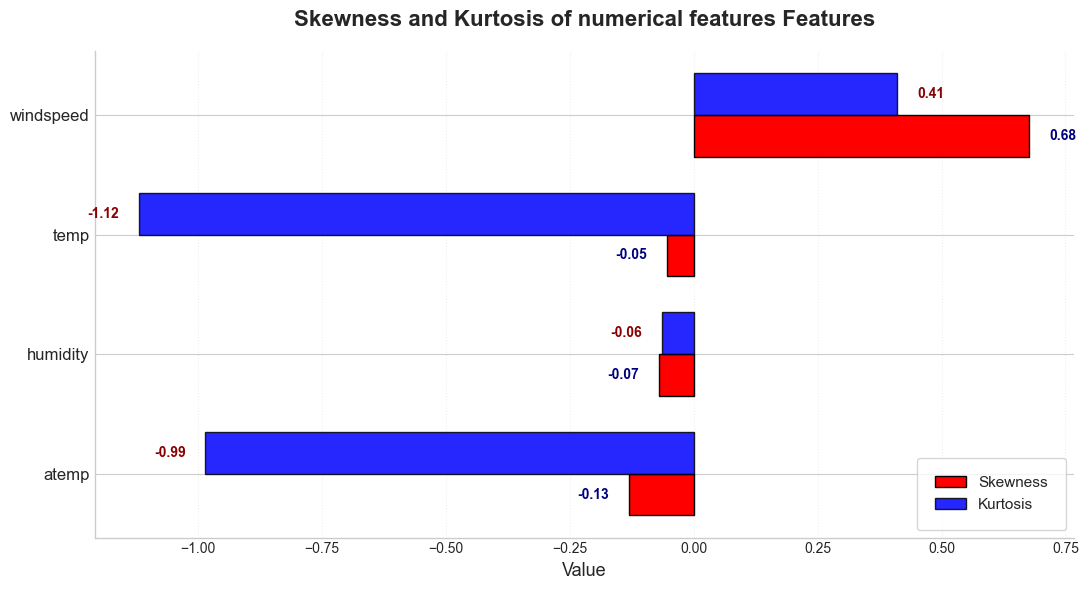

In [156]:
def plot_skewness_kurtosis(df, split_name="numerical features"):
    """
    Visualize skewness and kurtosis for numerical features in the DataFrame.

    Args:
        df: pandas DataFrame containing the data
        split_name: str, name for the numerical features (for title)
    """
    # Compute skewness and kurtosis directly from the provided DataFrame
    skewness = df.skew().sort_values()
    kurtosis = df.kurt().loc[skewness.index]  # align order with skewness
    features = skewness.index

    # set the figure size
    fig, ax = plt.subplots(figsize=(11, 6))

    # set the bar height
    bar_height = 0.35
    y = np.arange(len(features))


    # Plot skewness and kurtosis bars
    ax.barh(y - bar_height/2, skewness, height=bar_height, color="red", label='Skewness', edgecolor='black')
    ax.barh(y + bar_height/2, kurtosis, height=bar_height, color="blue", label='Kurtosis', edgecolor='black', alpha=0.85)

    # Annotate skewness and kurtosis values on bars
    for i, (sk, ku) in enumerate(zip(skewness, kurtosis)):
        ax.text(sk + (0.04 if sk >= 0 else -0.04), y[i] - bar_height/2, f"{sk:.2f}",
                color='navy', va='center', ha='left' if sk >= 0 else 'right', fontweight='bold', fontsize=10)
        ax.text(ku + (0.04 if ku >= 0 else -0.04), y[i] + bar_height/2, f"{ku:.2f}",
                color='darkred', va='center', ha='left' if ku >= 0 else 'right', fontweight='bold', fontsize=10)

    # Set y-ticks and labels
    ax.set_yticks(y)
    ax.set_yticklabels(features, fontsize=12)
    ax.set_xlabel('Value', fontsize=13)
    ax.set_title(f'Skewness and Kurtosis of {split_name} Features', fontsize=16, fontweight='bold', pad=18)

    # Custom legend
    ax.legend(loc='lower right', fontsize=11, frameon=True, borderpad=1.2)

    # Add grid for easier reading
    ax.grid(axis='x', linestyle=':', alpha=0.3)

    # Remove spines for a cleaner look
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.tight_layout()
    plt.show()

# Usage
plot_skewness_kurtosis(x_df[numerical_features])

### Summary of Skewness and Kurtosis Analysis

*Skewness* measures the asymmetry of a distribution. Values between -0.5 and 0.5 are considered approximately symmetric; values between -1 and -0.5 or 0.5 and 1 indicate moderate skewness; values less than -1 or greater than 1 indicate high skewness.

*Kurtosis* measures the "tailedness" of a distribution. A kurtosis near 0 (excess kurtosis) indicates a normal (mesokurtic) distribution. Negative values (platykurtic) indicate lighter tails and a flatter peak, while positive values (leptokurtic) indicate heavier tails and a sharper peak.

- **Temperature (temp):** Skewness = -0.05 (very close to 0, within [-0.5, 0.5]), indicating an almost perfectly symmetric distribution. Kurtosis = -1.12 (platykurtic, less than 0), meaning the distribution is flatter and has lighter tails than a normal distribution.

- **Apparent Temperature (atemp):** Skewness = -0.13 (within [-0.5, 0.5]), also nearly symmetric. Kurtosis = -0.99 (platykurtic), so the distribution is slightly flatter and more spread out than normal.

- **Humidity:** Skewness = -0.07 (within [-0.5, 0.5]), indicating a nearly symmetric distribution. Kurtosis = -0.06 (very close to 0), suggesting the distribution is very similar to normal, with no significant tail behavior.

- **Windspeed:** Skewness = 0.68 (within [0.5, 1]), indicating moderate positive skewness—values are concentrated toward the lower end with a longer right tail. Kurtosis = 0.41 (slightly positive, leptokurtic), so the distribution has a somewhat sharper peak and heavier tails than normal.


All four features have skewness and kurtosis values within the range that suggests distributions are close to normal, except windspeed, which shows moderate right skew and a slightly heavier tail. None of the features exhibit extreme skewness or kurtosis.

### 2.4.2 Correlations  <a class="anchor"></a>